# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [4]:
#install spacy in the current conda environment
!pip install spacy


In [5]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [7]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [8]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [9]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [10]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [11]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [12]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [13]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [14]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [15]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

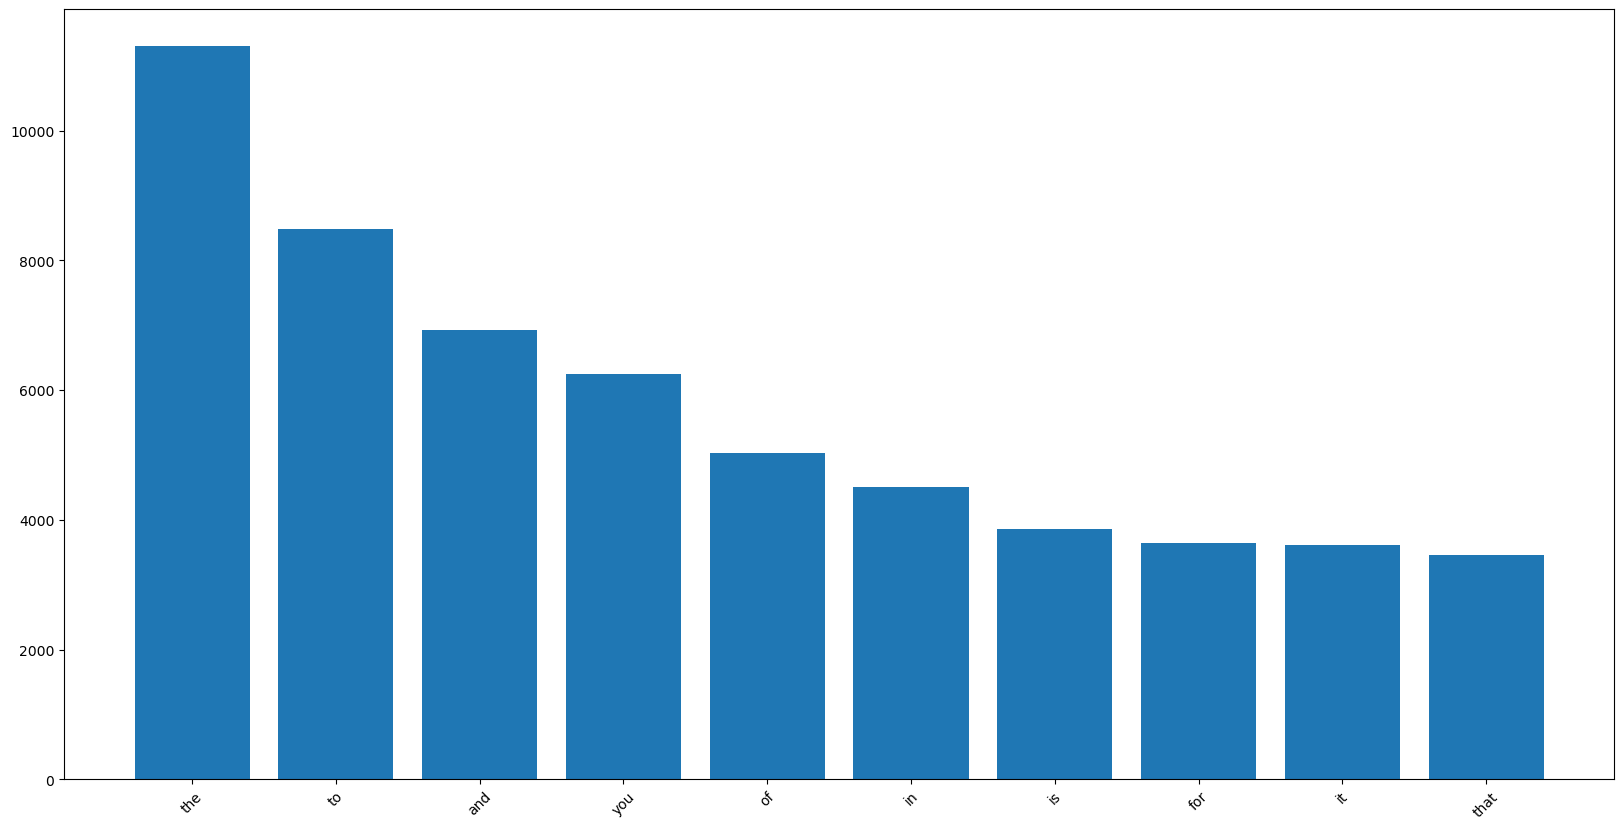

In [17]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here:These are all common words and the article "the" is used the most. I wouldn't say this is useful because it doesn't give much context.

#### Lemmatization and stopword removal

In [18]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [19]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [20]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [21]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [22]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [23]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

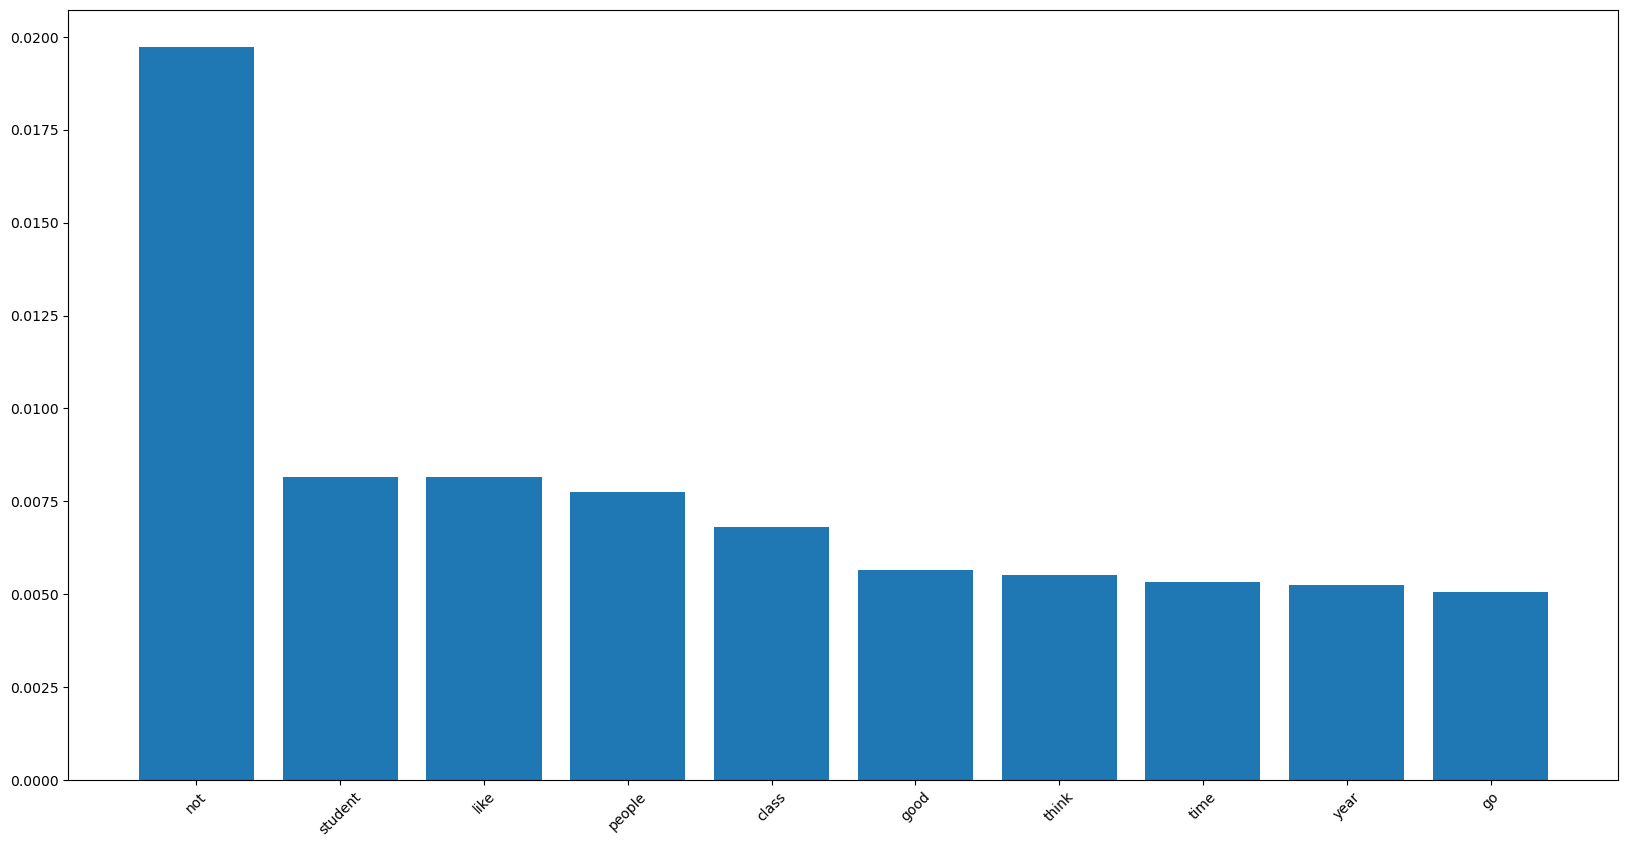

In [24]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [25]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [26]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["science", "music", "ball", "math", "english"]]
plot_list

science    0.000483
music      0.000110
ball       0.000048
math       0.002262
english    0.000103
dtype: float64

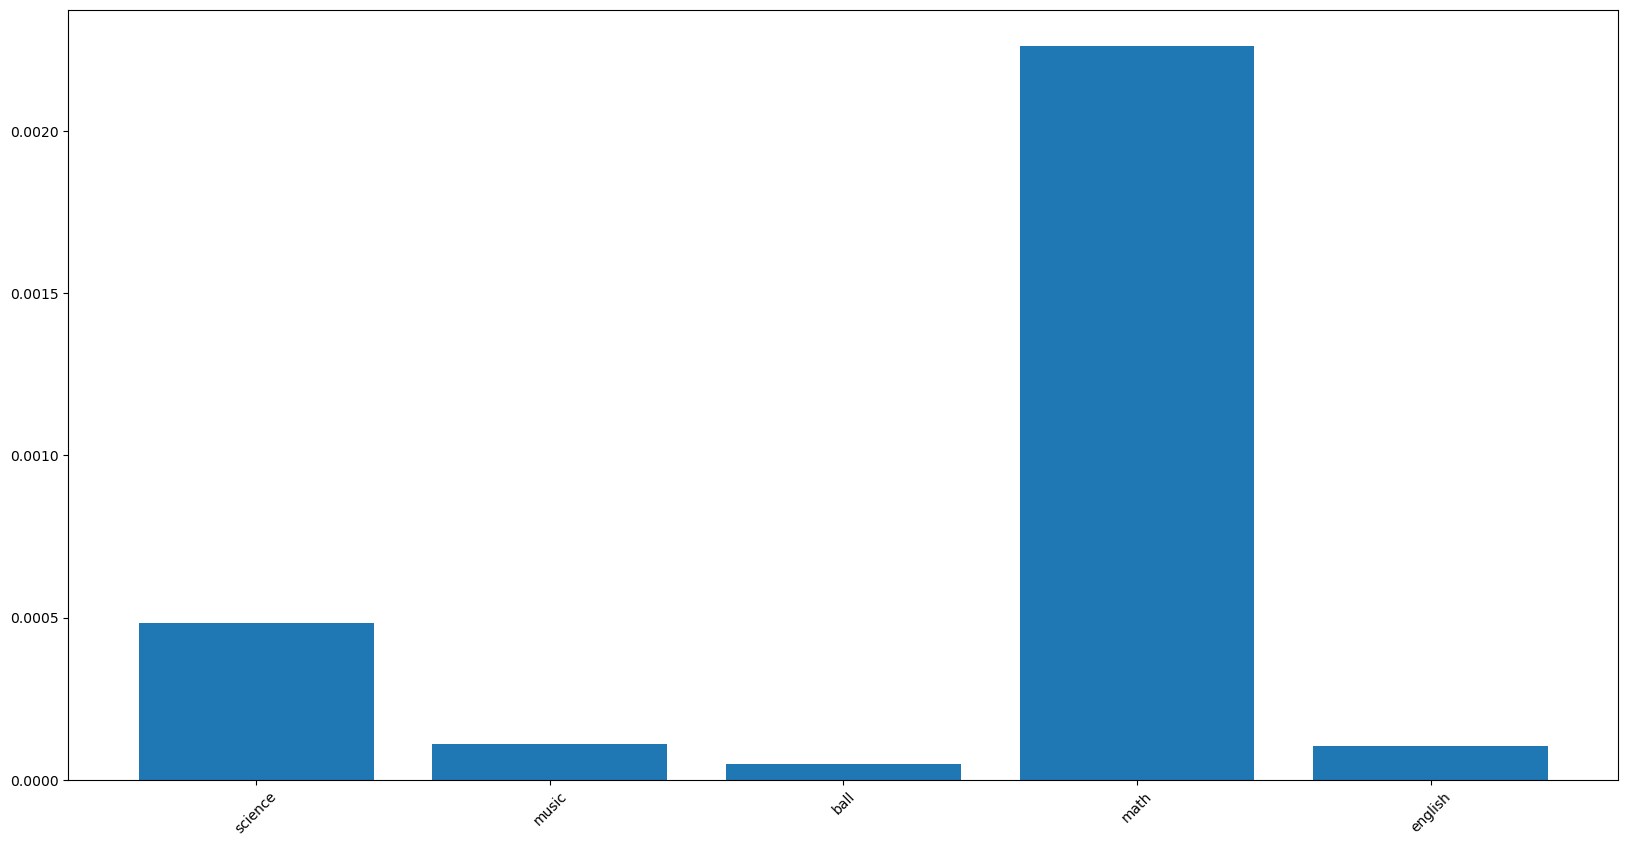

In [27]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [26]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

science, music, stats, math, english, ball. 

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

I am surprised how the amount of words that changes in each one. I wonder if I one article is actually using more words or if the article is just a lot bigger. Also the bag of word code line wouldn't run when I would switched to the mich article.

In [28]:
uiuc=pd.read_csv("uiuc.csv")


### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [29]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [ ]:
#clean and lemmatize the data csv

In [30]:
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)
data

,Unnamed: 0,date,post_votes,text,user,com_votes,label,cleaned_text,lemmatized_text
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1,have the same professor and in lecture he did ...,professor lecture go to learn stuff ourself re...
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1,do you find it helpful to still go to the lect...,find helpful lecture slide embed mistake make ...
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1,have you tried emailing university housing to ...,try email university housing request access
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1,purchasing illini cash should get you added to...,purchase illini cash add nonresident meal plan...
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1,just did thanks for the suggestion it hadnt oc...,thank suggestion not occur
...,...,...,...,...,...,...,...,...,...
6655,6655,2024-07-16 21:16:35,0,I don't think a university class has taught FO...,CorporateHobbyist,9,0,i dont think a university class has taught for...,not think university class teach fortran yea...
2694,2694,2024-08-25 04:15:30,2,No you definitely don’t have to be there to si...,Puzzleheaded_Net2428,1,0,no you definitely dont have to be there to sig...,definitely not sign mass meeting thursday sept...
3419,3419,2024-08-19 23:18:38,113,"Welcome week! Starting tomorrow, there are so...",1orange2oranges,1,0,welcome week starting tomorrow there are so ma...,welcome week start tomorrow activity stand
4241,4241,2024-08-11 18:43:57,3,I took 105 with Deva and loved it. Cool dude a...,pussyfkr420_69,2,0,i took with deva and loved it cool dude and t...,take deva love cool dude teach imo


In [ ]:
#create a bag of words representation with count vectorizer

In [31]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_wordsall = vectorizer.fit_transform(data['lemmatized_text'])
bag_of_wordsall

<9450x8423 sparse matrix of type '<class 'numpy.int64'>'
	with 125354 stored elements in Compressed Sparse Row format>

In [ ]:
#train a logistic regression model using the bag of words features as X and the label column as y

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(bag_of_wordsall, data['label'])

LogisticRegression()

In [ ]:
#report the accuracy of the model

In [33]:
y_pred = model.predict(bag_of_wordsall)
accuracy = accuracy_score(data['label'], y_pred)
accuracy

0.9003174603174603

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [ ]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 

The first model (.9038) performed better on the custom test set, which could be due to the test set being easier or more similar to the training data. This indicates that the model might be overfitting, meaning it’s too adjusted to the training data with the custom test set. In contrast, the split test reveals that the model struggles more with new data.


In [34]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_wordsall, data['label'], test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.71005291005291

#### Part 3: Examine the top features of your model using the following code

In [162]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


In [35]:
coef = model.coef_
coef_length = coef.size


In [ ]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

In [36]:
# Extract feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coef_values = model.coef_[0]

# Create a DataFrame for features and their coefficients
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coef_values})

# Sort the DataFrame by coefficient values in descending order
sorted_coef_df = coef_df.sort_values(by='coefficient', ascending=False)

# Get the top 10 features with the highest coefficients
top_10_positive_features = sorted_coef_df.head(10)

# Get the top 10 features with the lowest coefficients
top_10_negative_features = sorted_coef_df.tail(10)

# Display the top 10 positive features
top_10_positive_features


,feature,coefficient
7718,uiuc,2.780172
3326,illinois,1.883908
6209,rsos,1.816207
3728,las,1.750073
2885,grainger,1.696875
3323,illini,1.692287
919,champaign,1.691964
1524,danville,1.659837
7836,urbana,1.659508
3282,iclicker,1.619264


In [37]:
top_10_negative_features

,feature,coefficient
2956,gsi,-1.672358
7290,texas,-1.707369
4332,mcard,-1.750313
7725,um,-1.793076
7823,uofm,-1.829752
1939,eec,-1.994499
7984,vote,-2.006975
7727,umich,-2.052563
2505,fresno,-2.090003
4419,michigan,-2.618742


Words associated with UIUC have high positive coefficients, suggesting a strong positive sentiment or association with the university. In contrast, words related to UMICH have high negative coefficients, indicating a strong negative sentiment or association with UMICH. This pattern is generally expected if the data reflects different sentiments or biases towards the two universities. However, the specific coefficient values might be surprising if they deviate from anticipated patterns or expected sentiment trends.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [38]:
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1
...,...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0,1
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4,1
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5,1
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3,1


In [39]:
pip install scipy==1.12

Note: you may need to restart the kernel to use updated packages.


In [50]:
def clean(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    text = ' '.join(text.split())
    return text
uiuc["text"] = uiuc["text"].apply(clean)

In [62]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
import pandas as pd

# Sample data
# uiuc = pd.DataFrame({'text': [...]})  # Replace with your actual data loading method

# Tokenize
comments = uiuc['text'].values
processed_comments = [simple_preprocess(comment, deacc=True) for comment in comments]

# Create a dictionary
dictionary = corpora.Dictionary(processed_comments)

# Create a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in processed_comments]

# Train LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, 
                                    update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Print top words for each topic
topics = lda_model.print_topics(num_words=10)
for topic_num, topic in enumerate(topics):
    print(f"Topic {topic_num}: {topic}")

# Get the topic distribution for each document
topic_distributions = lda_model.get_document_topics(corpus)

# Collect comments for each topic
topic_comments = {i: [] for i in range(lda_model.num_topics)}

for i, doc_topics in enumerate(topic_distributions):
    # Find the most probable topic for this document
    most_probable_topic = max(doc_topics, key=lambda x: x[1])[0]
    topic_comments[most_probable_topic].append(comments[i])

# Print a few comments for each topic
for topic_num in range(lda_model.num_topics):
    print(f"\nTop comments for Topic {topic_num}:")
    comments_for_topic = topic_comments[topic_num]
    if comments_for_topic:
        for comment in comments_for_topic[:5]:  # Print the first 5 comments for brevity
            print(f" - {' '.join(comment)}")
    else:
        print(" No comments available for this topic.")


Topic 0: (0, '0.055*"to" + 0.050*"the" + 0.041*"and" + 0.036*"you" + 0.026*"of" + 0.022*"in" + 0.021*"it" + 0.021*"that" + 0.020*"for" + 0.016*"have"')
Topic 1: (1, '0.033*"thank" + 0.030*"should" + 0.028*"week" + 0.025*"give" + 0.024*"start" + 0.022*"sorry" + 0.022*"may" + 0.021*"ill" + 0.016*"since" + 0.014*"sounds"')
Topic 2: (2, '0.078*"was" + 0.037*"thats" + 0.033*"how" + 0.032*"am" + 0.018*"parking" + 0.017*"him" + 0.017*"never" + 0.016*"lol" + 0.014*"down" + 0.013*"during"')
Topic 3: (3, '0.049*"yeah" + 0.041*"please" + 0.036*"dm" + 0.036*"illinois" + 0.034*"quite" + 0.028*"info" + 0.024*"extra" + 0.021*"course" + 0.020*"full" + 0.013*"natural"')
Topic 4: (4, '0.030*"did" + 0.029*"say" + 0.028*"classes" + 0.028*"why" + 0.024*"try" + 0.023*"being" + 0.022*"better" + 0.020*"weather" + 0.019*"while" + 0.017*"always"')
Topic 5: (5, '0.037*"back" + 0.026*"these" + 0.025*"bike" + 0.022*"safe" + 0.020*"permit" + 0.017*"her" + 0.017*"hall" + 0.016*"car" + 0.015*"usually" + 0.015*"looks"